# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/justmarkham/DAT4-students/blob/master/kerry/Final/NBA_players_2015.csv), [data dictionary](https://github.com/justmarkham/DAT-project-examples/blob/master/pdf/nba_paper.pdf)
- **Goal:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [51]:
# read the data into a DataFrame
import pandas as pd
nba_path = '../../../../2_dataset/NBA_players_2015.csv'
nba = pd.read_csv(nba_path, index_col=0)

In [52]:
# examine the columns
nba.columns

Index(['season_end', 'player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp',
       'fg', 'fga', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa', 'x2p_', 'ft',
       'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [53]:
# examine the positions
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [54]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [55]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [56]:
# alternative way to create X
X = nba.loc[:, 'ast':'pf']

In [57]:
# create response vector (y)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [58]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# instantiate with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [60]:
# fit with data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [61]:
# create a list to represent a player
player = [[1, 1, 0, 1, 2]]

In [62]:
# make a prediction
knn.predict(player)

array([2], dtype=int64)

In [63]:
# calculate predicted probabilities
knn.predict_proba(player)

array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [64]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)
knn.predict(player)

array([1], dtype=int64)

In [65]:
# calculate predicted probabilities
knn.predict_proba(player)

array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to decide which ones are predictive

In [66]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [67]:
# description of assists grouped by position
nba.groupby('pos').ast.describe().unstack()

       pos
count  C       79.000000
       F      199.000000
       G      200.000000
mean   C        0.945570
       F        1.173367
       G        2.729000
std    C        0.858263
       F        1.086252
       G        2.128287
min    C        0.000000
       F        0.000000
       G        0.000000
25%    C        0.400000
       F        0.450000
       G        1.100000
50%    C        0.800000
       F        0.900000
       G        2.250000
75%    C        1.150000
       F        1.500000
       G        3.800000
max    C        4.400000
       F        7.300000
       G       10.200000
dtype: float64

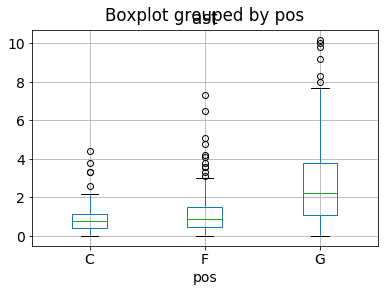

In [68]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos');

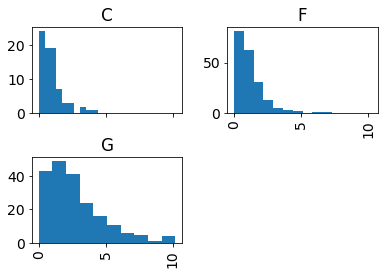

In [69]:
# histogram of assists grouped by position
nba.hist(column='ast', by='pos', sharex=True);